In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings
import os

%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
data8 = pd.read_csv("우선돌봄정책.csv", encoding='euc-kr', header=1, index_col=0)

In [8]:
temp_index = data8.copy()
temp_index.reset_index(drop= False,inplace=True)
temp_index

,구분1,구분2,사례수,지역아동센터 청소년아카데미 등 학교이외에 돌봄서비스를 제공,학교에서 새벽6시~8시 방과후~10시까지 돌봐주는 서비스(방과후 학교 프로그램),교육비 지원,영어 취미활동 등 방과후학교 프로그램 개선?확대,가족구성원이 돌보는 경우 일정금액 지급하는 가족돌봄수당 지급,아동의 집에서 아동을 돌봐주는 아이돌보미 파견,돌봄비용에 대한 세금공제 확대,모름/무응답,계
0,전 체,전 체,3508,34.6,22.3,17.0,14.9,5.5,3.6,2.1,0.0,100
1,성 별,남 성,1750,35.2,22.1,17.1,15.2,4.7,3.1,2.6,0.0,100
2,성 별,여 성,1758,33.9,22.5,16.8,14.7,6.4,4.0,1.6,0.1,100
3,연 령,20 -29세,714,33.7,24.3,17.3,13.3,4.2,4.1,3.0,0.0,100
4,연 령,30 -39세,878,32.3,21.5,18.5,16.0,6.4,3.4,1.9,0.0,100
5,연 령,40 -49세,927,36.0,22.0,16.1,16.0,5.9,2.7,1.0,0.2,100
6,연 령,50 -59세,742,36.4,21.8,15.9,14.4,4.2,4.5,2.8,0.0,100
7,연 령,60세 이상,247,34.1,22.1,16.8,13.1,8.6,3.5,1.8,0.0,100
8,혼인 상태,기혼 유배우,2481,34.6,21.6,17.4,15.0,5.8,3.6,1.8,0.1,100
9,혼인 상태,기혼 무배우,247,32.8,23.7,15.5,15.4,6.6,3.5,2.6,0.0,100


In [19]:
data8.columns[2:10]

Index(['지역아동센터 청소년아카데미 등 학교이외에 돌봄서비스를 제공',
       '학교에서 새벽6시~8시 방과후~10시까지 돌봐주는 서비스(방과후 학교 프로그램)', '교육비 지원',
       '영어 취미활동 등 방과후학교 프로그램 개선?확대', '가족구성원이 돌보는 경우 일정금액 지급하는 가족돌봄수당 지급',
       '아동의 집에서 아동을 돌봐주는 아이돌보미 파견', '돌봄비용에 대한 세금공제 확대', '모름/무응답'],
      dtype='object')

In [90]:
def show_pie(ax, index_num, title_name):
    explode = [0.1, 0, 0.1, 0, 0.1, 0, 0, 0]
    
    # 데이터 정렬
    values = data8.iloc[index_num, 2:10]  # 데이터 선택
    labels = data8.columns[2:10]  # 레이블 선택
    sorted_indices = values.argsort()[::-1]  # 값의 인덱스를 정렬 (내림차순)
    sorted_values = values[sorted_indices]  # 정렬된 값
    sorted_labels = labels[sorted_indices]  # 정렬된 레이블
    
    # 상위 4개 인덱스 추출
    top_n = 4
    top_indices = sorted_indices[:top_n]
    
    # 라벨 설정: 상위 4개만 표시하고 나머지는 공백
    display_labels = ['' for _ in range(len(sorted_labels))]
    for i in top_indices:
        display_labels[sorted_indices.tolist().index(i)] = sorted_labels[sorted_indices.tolist().index(i)]
    
    # 긴 레이블을 줄 바꿈 처리
    for i in range(len(display_labels)):
        if display_labels[i]:
            display_labels[i] = display_labels[i].replace(' ', '\n', 4)  # 4번째까지 줄 바꿈 처리

    # 퍼센트 표시 함수 정의
    def func(p):
        return '{:.1f}%'.format(p) if p > 10 else ''  

    ax.pie(sorted_values, labels=display_labels, autopct=func, startangle=90, explode=explode, counterclock=False)
    ax.set_title(title_name)

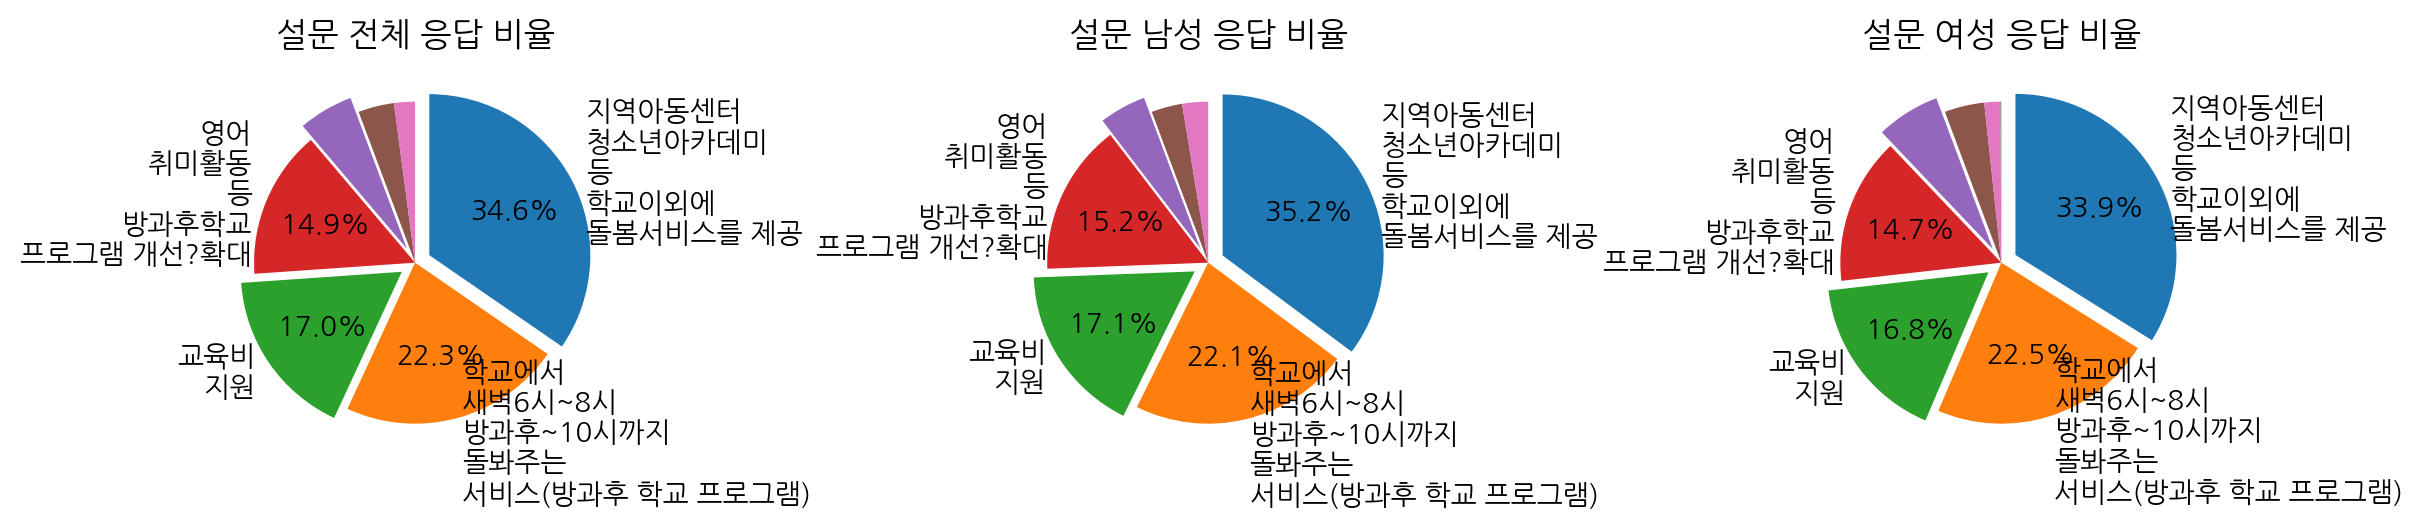

In [92]:
fig = plt.figure(figsize=(12, 4))


ax1 = fig.add_subplot(1, 3, 1)  
show_pie(ax1, 0, '설문 전체 응답 비율')  

ax2 = fig.add_subplot(1, 3, 2)  
show_pie(ax2, 1, '설문 남성 응답 비율')  

ax3 = fig.add_subplot(1, 3, 3)  
show_pie(ax3, 2, '설문 여성 응답 비율')  

plt.tight_layout()
plt.show()

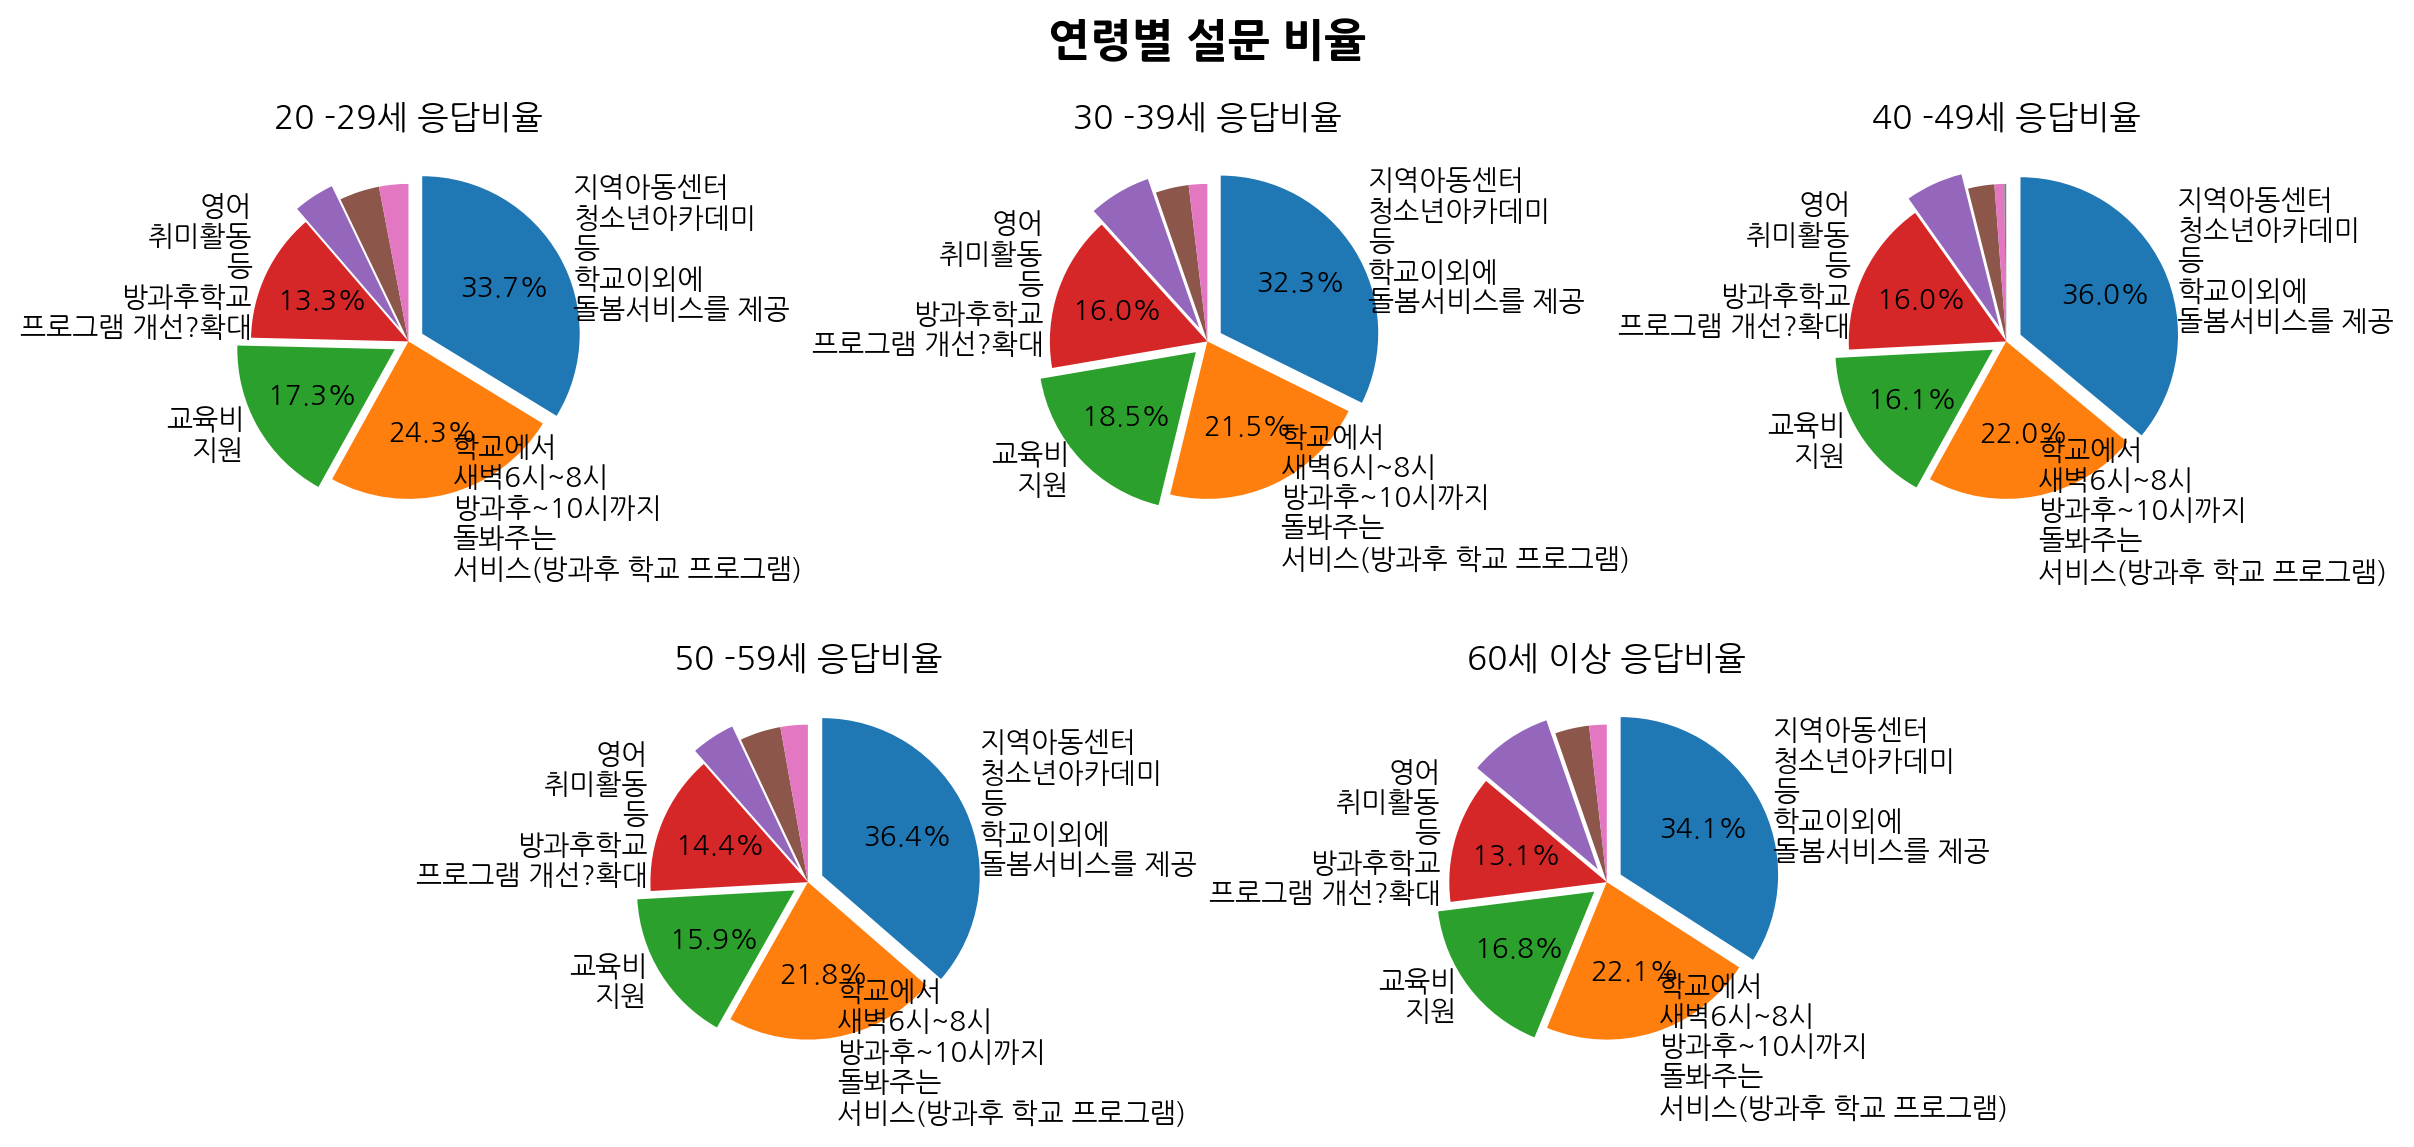

In [106]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 3)  # 2행 3열의 그리드 생성
plt.suptitle("연령별 설문 비율", fontsize=16, fontweight='bold') 


ax1 = fig.add_subplot(gs[0, 0])  # 1번 (1행 1열)
ax2 = fig.add_subplot(gs[0, 1])  # 2번 (1행 2열)
ax3 = fig.add_subplot(gs[0, 2])  # 3번 (1행 3열)
ax4 = fig.add_subplot(gs[1, 0:2])  # 4번 (2행 1열, 2열 병합)
ax5 = fig.add_subplot(gs[1, 1:3])  # 5번 (2행 2열, 3열 병합)

show_pie(ax1, 3, '20 -29세 응답비율')
show_pie(ax2, 4, '30 -39세 응답비율')
show_pie(ax3, 5, '40 -49세 응답비율')
show_pie(ax4, 6, '50 -59세 응답비율')
show_pie(ax5, 7, '60세 이상 응답비율')

plt.tight_layout()
plt.show()

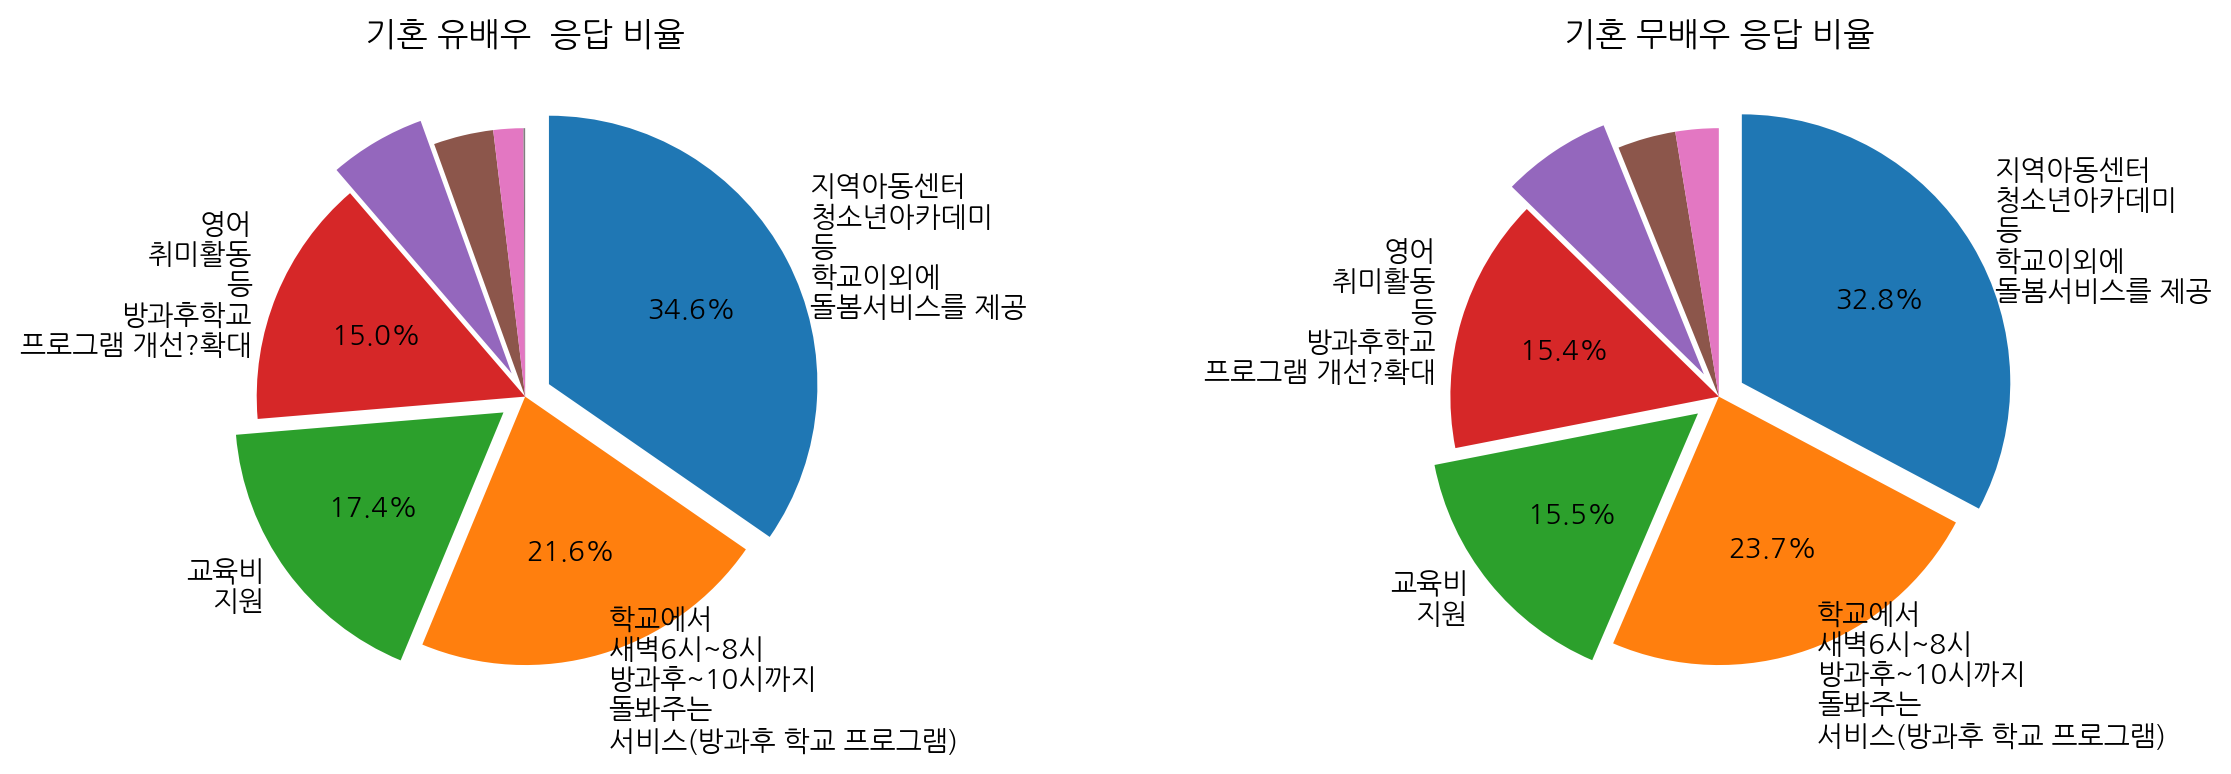

In [100]:
fig = plt.figure(figsize=(12, 4))


ax1 = fig.add_subplot(1, 2, 1)  
show_pie(ax1, 8, '기혼 유배우  응답 비율')  

ax2 = fig.add_subplot(1, 2, 2)  
show_pie(ax2, 9, '기혼 무배우 응답 비율')  


plt.tight_layout()
plt.show()